In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# from jax import config

# from mbipy.jax.phase_retrieval import (
#     xsvt as jax_xsvt,
#     csvt as jax_csvt,
#     wsvt as jax_wsvt,
#     xst as jax_xst,
# )

from mbipy.numpy.phase_retrieval import xst_xsvt, wst_wsvt, cst_csvt
from mbipy.numpy.phase_retrieval import xsvt, wsvt, csvt
from mbipy.numpy.phase_retrieval import xst, wst, cst

# config.update("jax_enable_x64", True)

with h5py.File("./data/BeLens.h5", "r") as f:
    sample = f["50"]["sample"][:]
    reference = f["50"]["reference"][:]
    sample = sample.astype(np.float64) / np.iinfo(sample.dtype).max
    reference = reference.astype(np.float64) / np.iinfo(reference.dtype).max

In [2]:
def plot_results(titles, results, figsize=None):
    assert len(titles) == len(results)
    size = len(results)
    fig = plt.figure(layout="constrained", figsize=figsize or (8, 8 * size))
    subfigs = fig.subfigures(size, 1, wspace=0.07)
    for i, j in enumerate(titles):
        subfigs[i].suptitle(j)

    for i, j in enumerate(results):
        axes = subfigs[i].subplots(1, 6)  # , sharex=True, sharey=True)
        im0 = axes[0].imshow(j[0])
        im1 = axes[1].imshow(j[1])
        plt.colorbar(im0, ax=axes[0], fraction=0.05, pad=0.04)
        plt.colorbar(im1, ax=axes[1], fraction=0.05, pad=0.04)
        axes[2].plot(j[0][460:470].mean(axis=0))
        axes[3].plot(j[1][460:470].mean(axis=0))
        axes[4].plot(j[0][:, 400:410].mean(axis=1))
        axes[5].plot(j[1][:, 400:410].mean(axis=1))

In [37]:
N = 0
ss = (15, 15)  # search window shape
ts = (7, 7)  # template window shape

In [4]:
%%time
result_xst = xst(sample[N], reference[N], ss, ts)

CPU times: user 3.71 s, sys: 571 ms, total: 4.28 s
Wall time: 4.37 s


In [5]:
%%time
result_wst = wst(sample[N], reference[N], ss, ts)

CPU times: user 4.57 s, sys: 767 ms, total: 5.34 s
Wall time: 5.46 s


In [39]:
%%time
result_cst = cst(sample[N], reference[N], ss, ts, dct_kwargs={"workers": 8}, cutoff=10)

CPU times: user 2.93 s, sys: 1.05 s, total: 3.99 s
Wall time: 4.25 s


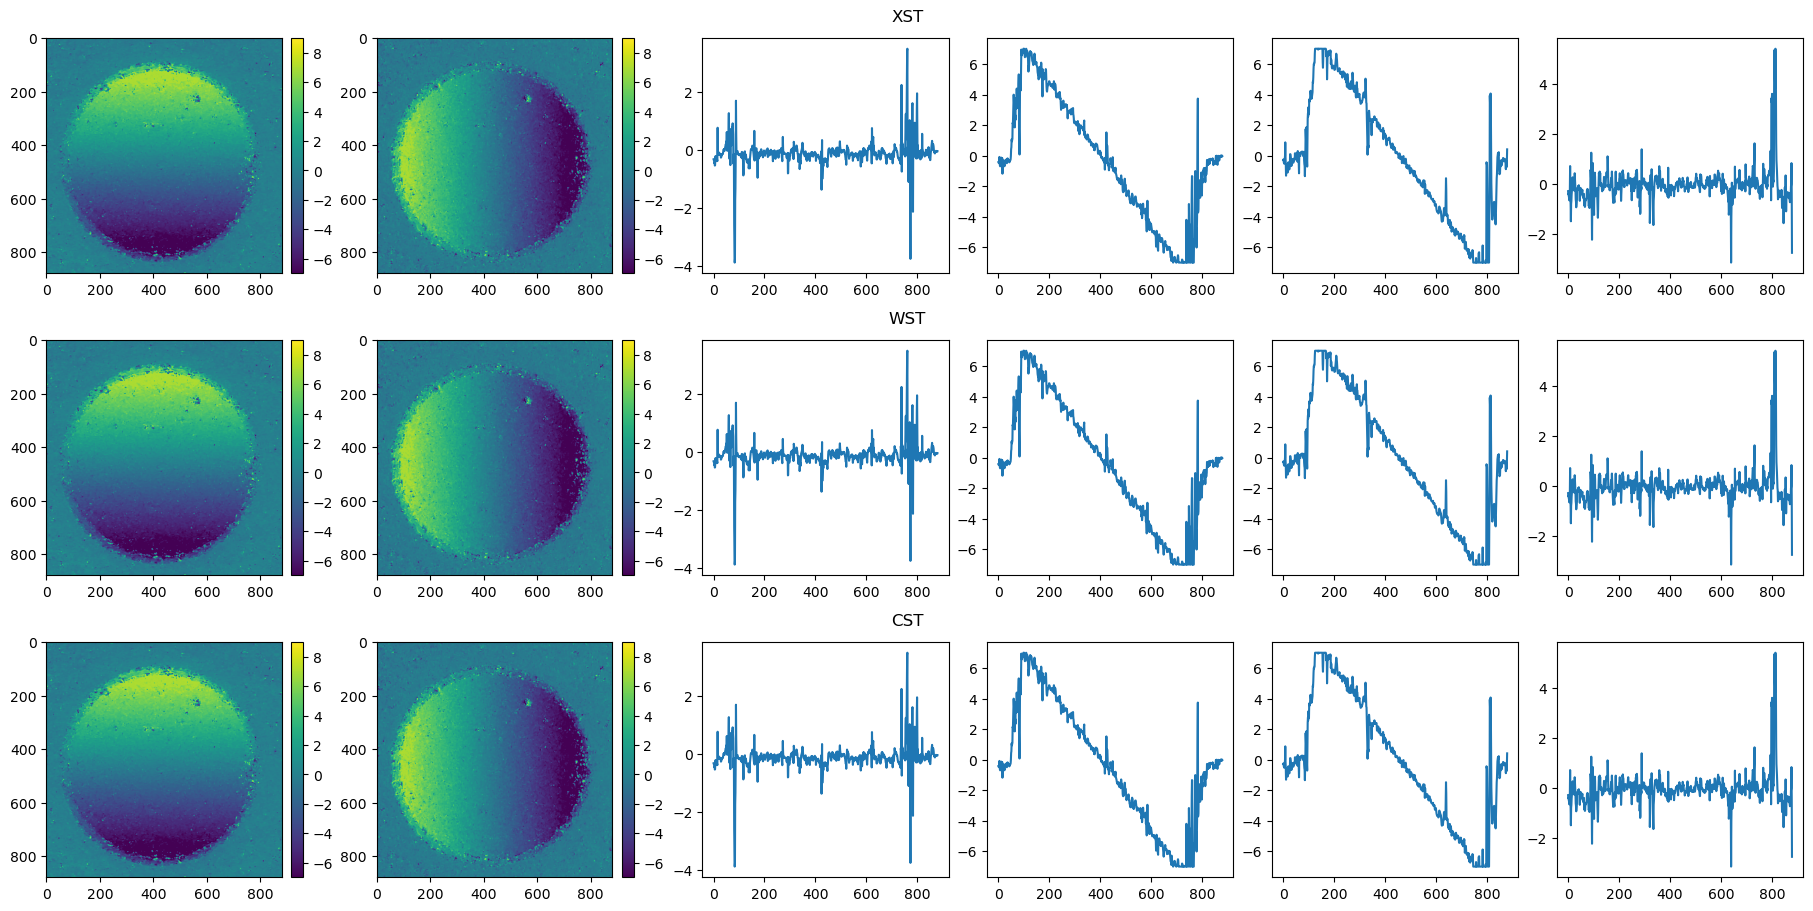

In [7]:
plot_results(("XST", "WST", "CST"), (result_xst, result_wst, result_cst), (18, 9))

In [8]:
np.allclose(result_xst[0], result_wst[0]), np.allclose(result_xst[1], result_wst[1])

(True, True)

In [9]:
np.allclose(result_xst[0], result_cst[0]), np.allclose(result_xst[1], result_cst[1])

(True, True)

In [10]:
%%time
result_xsvt = xsvt(sample, reference, 7, 7)

CPU times: user 4.64 s, sys: 562 ms, total: 5.2 s
Wall time: 5.34 s


In [11]:
%%time
result_wsvt = wsvt(sample, reference, 7, 7)

CPU times: user 5.4 s, sys: 520 ms, total: 5.92 s
Wall time: 6.01 s


In [12]:
%%time
result_csvt = csvt(sample, reference, 7, 7)

CPU times: user 4.6 s, sys: 470 ms, total: 5.07 s
Wall time: 5.14 s


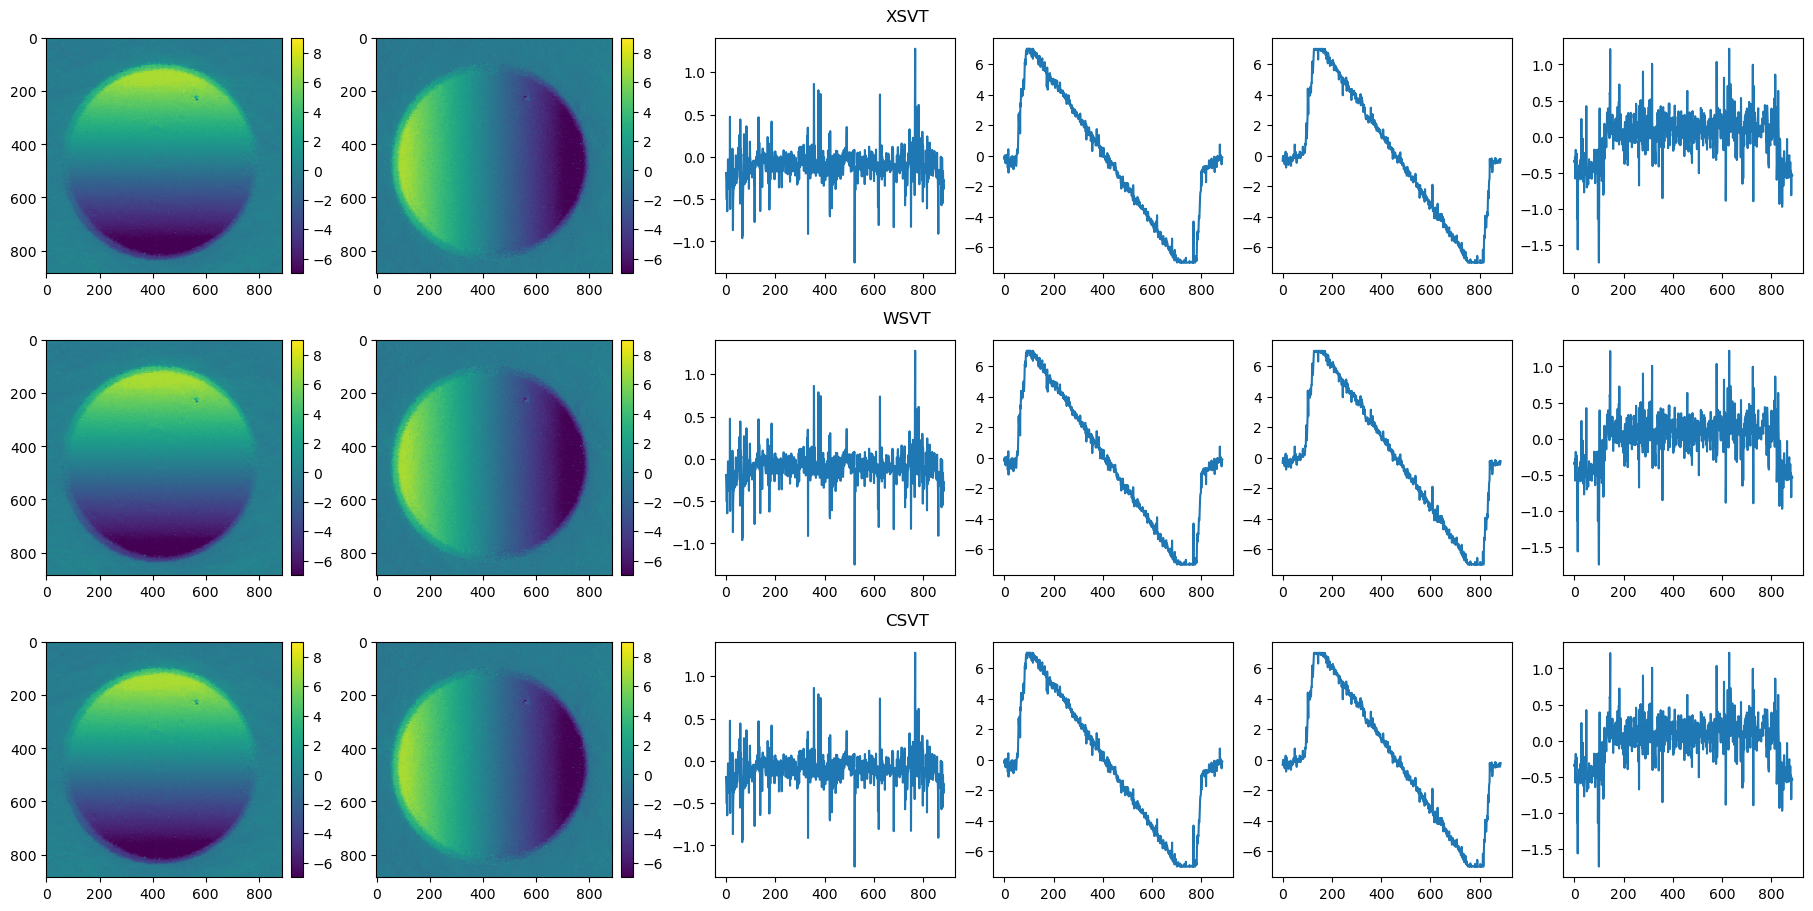

In [13]:
plot_results(("XSVT", "WSVT", "CSVT"), (result_xsvt, result_wsvt, result_csvt), (18, 9))

In [14]:
np.allclose(result_xsvt[0], result_wsvt[0]), np.allclose(result_xsvt[1], result_wsvt[1])

(True, True)

In [15]:
np.allclose(result_xsvt[0], result_csvt[0]), np.allclose(result_xsvt[1], result_csvt[1])

(True, True)

In [16]:
%%time
result_xst_xsvt = xst_xsvt(sample, reference, (15, 15), (3, 3))
     

CPU times: user 6.02 s, sys: 769 ms, total: 6.79 s
Wall time: 6.93 s


In [17]:
%%time
result_wst_wsvt = wst_wsvt(sample, reference, (15, 15), (3, 3))

CPU times: user 7.56 s, sys: 1.01 s, total: 8.56 s
Wall time: 8.78 s


In [18]:
%%time
result_cst_csvt = cst_csvt(sample, reference, (15, 15), (3, 3), dct_kwargs={"workers": 1}) 

CPU times: user 6.29 s, sys: 774 ms, total: 7.06 s
Wall time: 7.19 s


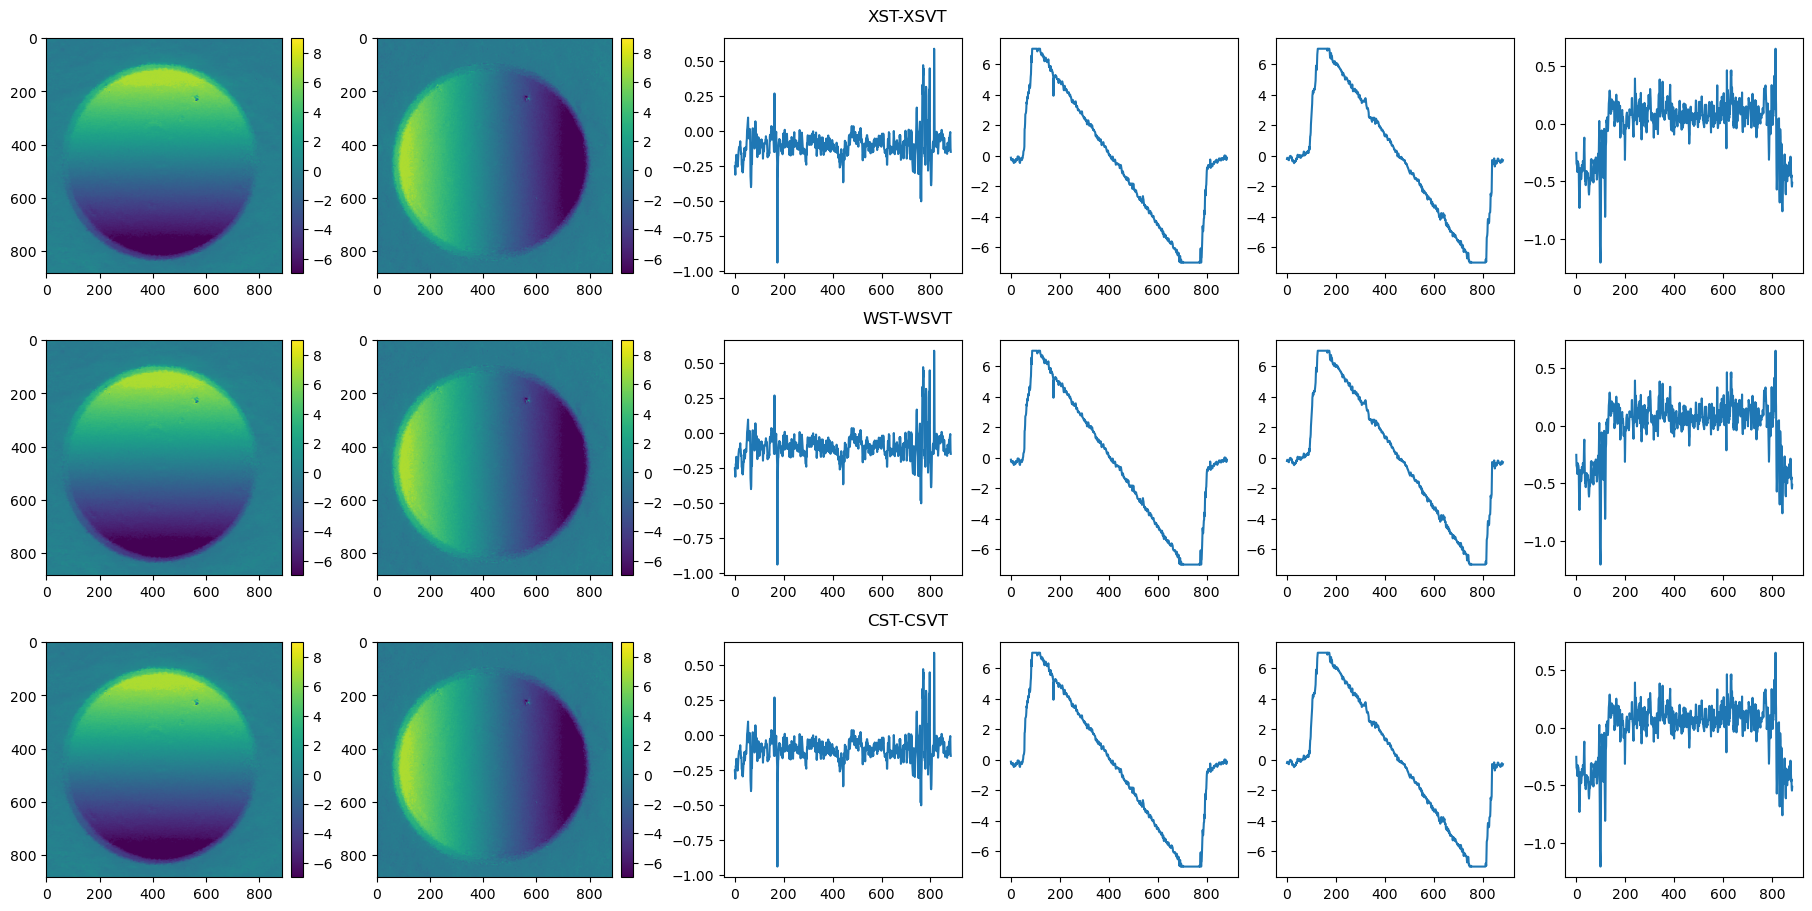

In [19]:
plot_results(
    ("XST-XSVT", "WST-WSVT", "CST-CSVT"),
    (result_xst_xsvt, result_wst_wsvt, result_cst_csvt),
    (18, 9),
)

In [20]:
np.allclose(result_xst_xsvt[0], result_wst_wsvt[0]), np.allclose(result_xst_xsvt[1], result_wst_wsvt[1])

(True, True)

In [21]:
np.allclose(result_xst_xsvt[0], result_wst_wsvt[0]), np.allclose(result_xst_xsvt[1], result_wst_wsvt[1])

(True, True)